In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.model_selection import GridSearchCV

In [4]:
recipes=pd.read_csv("c:\Muffin.csv")
recipes

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_18664\2578106339.py:1: SyntaxWarning: invalid escape sequence '\M'
  recipes=pd.read_csv("c:\Muffin.csv")


,Type,Flour,Milk,Sugar,Butter,egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,50,25,12,6,5,2,1,0
4,Muffin,55,27,3,7,5,2,1,0
5,Muffin,54,27,7,5,5,2,0,0
6,Muffin,47,26,10,10,4,1,0,0
7,Muffin,50,17,17,8,6,1,0,0
8,Muffin,50,17,17,11,4,1,0,0
9,Cupcake,39,0,26,19,14,1,1,0


In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           18 non-null     object
 1   Flour          18 non-null     int64 
 2   Milk           18 non-null     int64 
 3   Sugar          18 non-null     int64 
 4   Butter         18 non-null     int64 
 5   egg            18 non-null     int64 
 6   Baking Powder  18 non-null     int64 
 7   Vanilla        18 non-null     int64 
 8   Salt           18 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ KB


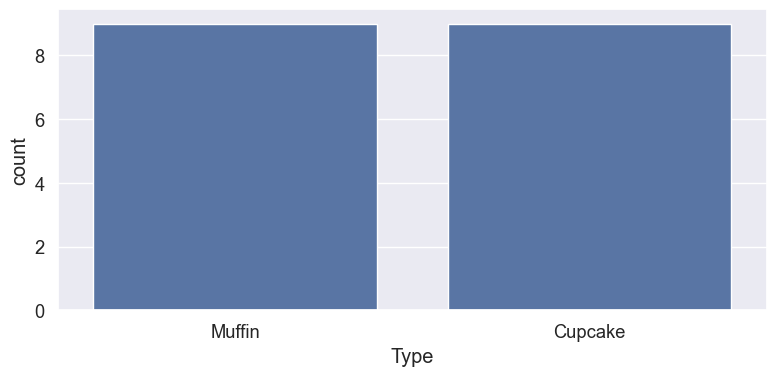

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x=recipes['Type'])
plt.tight_layout()

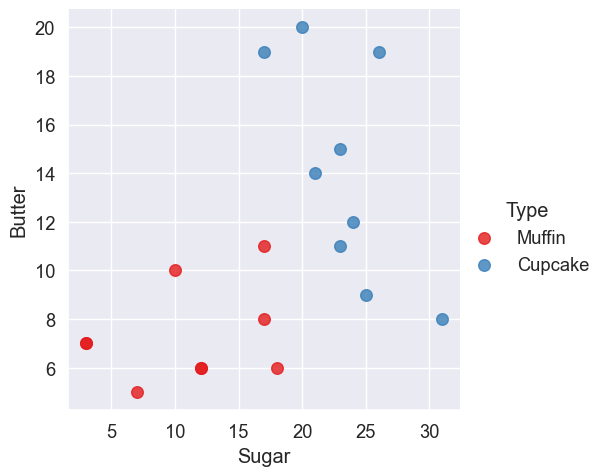

In [10]:
sns.lmplot(x='Sugar',y='Butter', data=recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s":70})

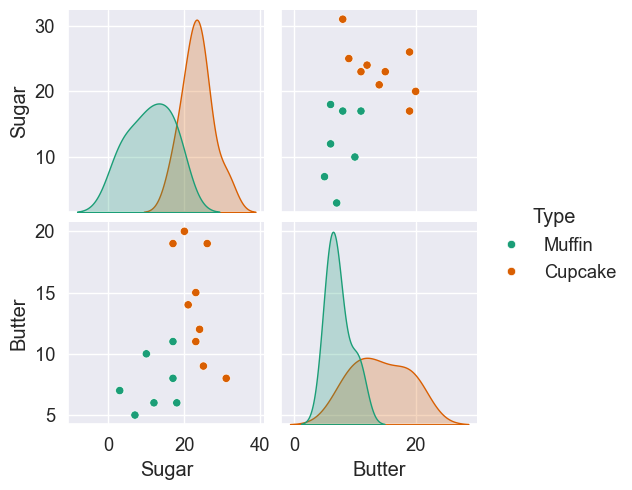

In [12]:
sns.pairplot(recipes, vars=['Sugar','Butter'],hue='Type',palette='Dark2')

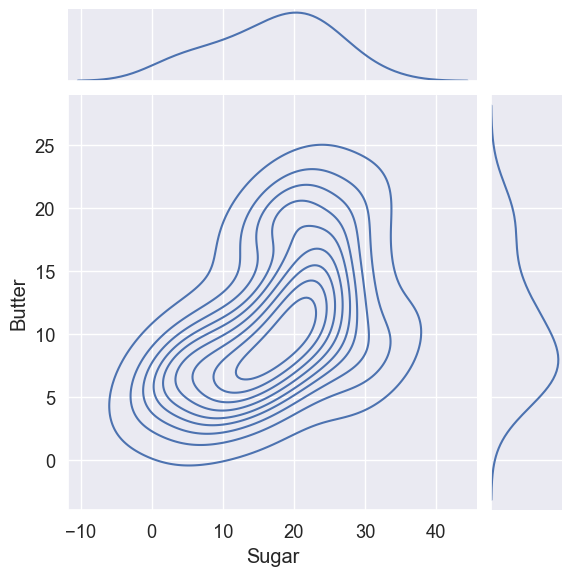

In [14]:
sns.jointplot(x='Sugar',y='Butter',data=recipes,kind='kde')
plt.show()

In [16]:
X=recipes.drop('Type',axis=1)
y=recipes['Type']

In [18]:
kernels=['Polynominal','RBF','Sigmoid','Linear']

In [20]:
def getClassifier(ktype):
    if ktype==0:
        return SVC(kernel='poly',degree=8,gamma="auto")
    elif ktype==1:
        return SVC(kernel='rbf',gamma="auto")
    elif ktype==2:
        return SVC(kernel='sigmoid',gamma="auto")
    elif ktype==3:
        return SVC(kernel='linear',gamma="auto")

In [22]:
for i in range(4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
    svclassifier=getClassifier(i)
    svclassifier.fit(X_train,y_train)
    y_pred=svclassifier.predict(X_test)
    print("Evaluation:",kernels[i],"kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynominal kernel
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         1
      Muffin       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Evaluation: RBF kernel
              precision    recall  f1-score   support

     Cupcake       0.00      0.00      0.00         2
      Muffin       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

     Cupcake       0.00      0.00      0.00         3
      Muffin       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20    

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\s

In [24]:
svm_classifier=SVC(gamma='auto')
svm_classifier.fit(X_train,y_train)

SVC(gamma='auto')

In [26]:
svm_classifier.score(X_train,y_train)

1.0

In [28]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}

In [30]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [32]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [34]:
grid_predictions=grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[3 0]
 [0 1]]
              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         3
      Muffin       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

